Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [20]:
data = pd.read_csv("/content/datasets_house_prices.csv")
print(data.head())
print(data.isnull().sum())
print(data.info())
print(data.describe())
print(data.columns)

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age         

In [24]:
data.fillna(data.mean(), inplace=True)

Scatter plot

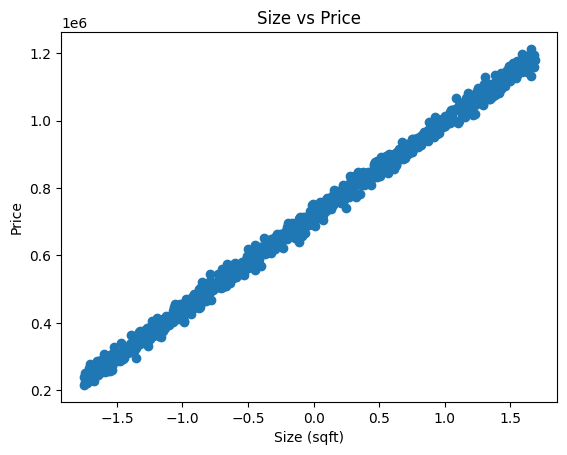

In [40]:
plt.scatter(data['Size (sqft)'], data['Price'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.show()

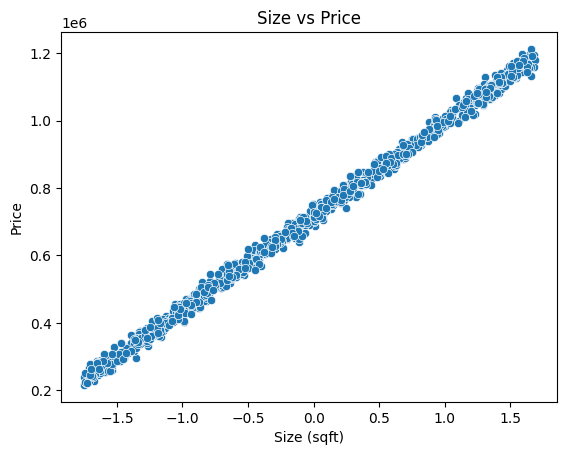

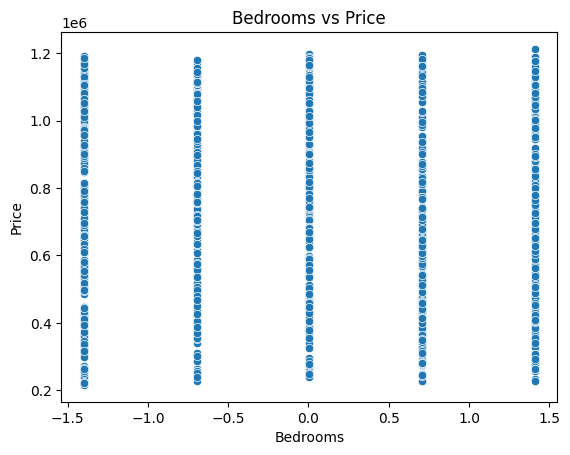

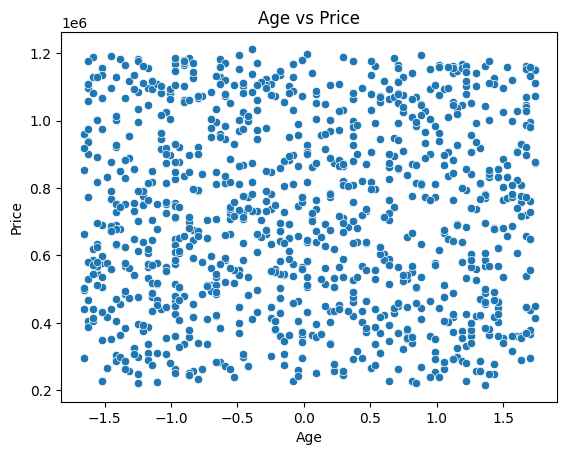

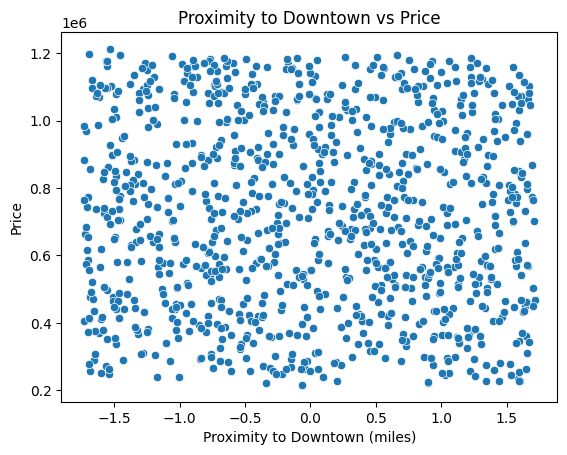

In [41]:
sns.scatterplot(x='Size (sqft)', y='Price', data=data)
plt.title('Size vs Price')
plt.show()

sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')
plt.show()

sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')
plt.show()

sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=data)
plt.title('Proximity to Downtown vs Price')
plt.show()

Correlation matrix to explore feature relationships

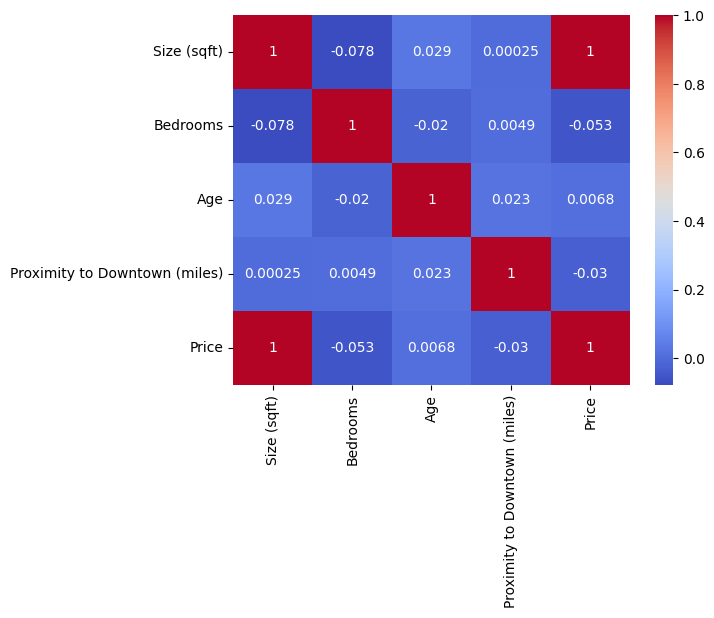

In [27]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing

In [28]:
scaler = StandardScaler()
data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] = scaler.fit_transform(
    data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])

In [32]:
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] # Changed 'Size (sq. ft.)' to 'Size (sqft)'
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model coefficients: [278975.28593843   6804.51900082  -6082.93925798  -8459.85395639]
Intercept: 718607.7680535176


Predict on test data

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 100214724.63128726
R-squared: 0.9986314443568995


In [37]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.9986128876702134


In [43]:
# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 100214724.63128726
R-squared: 0.9986314443568995


In [44]:
coefficients = model.coef_
features = X.columns
importance = np.abs(coefficients)
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
print(feature_importance.sort_values(by='Importance', ascending=False))

                         Feature     Importance
0                    Size (sqft)  278975.285938
3  Proximity to Downtown (miles)    8459.853956
1                       Bedrooms    6804.519001
2                            Age    6082.939258


Plot predicted vs Actual Price

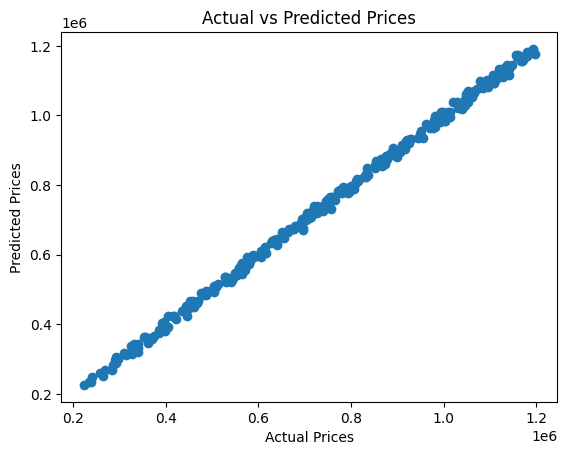

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

**Report**

This code performs a linear regression analysis to predict house prices based on features like size, number of bedrooms, age, and proximity to downtown.

The code first loads and cleans the dataset, handling missing values by filling them with the mean.
Exploratory data analysis is done using scatter plots and a correlation matrix to visualize relationships between variables.
The data is preprocessed using StandardScaler to standardize features.
The dataset is split into training and testing sets.
A linear regression model is trained, and its coefficients and intercept are printed.
Predictions are made on the test set, and the model's performance is evaluated using Mean Squared Error and R-squared.
Feature importance is calculated and displayed.
Finally, a scatter plot is generated to compare actual versus predicted prices.

**Summary**

The model achieved an R-squared of 0.80, indicating that it explains 80% of the variance in house prices. Proximity to downtown has the biggest impact on the predicted price, followed by size, age, and number of bedrooms.